<a href="https://colab.research.google.com/github/BamjosAdeniyi/COSC947-NLP-Hands-on/blob/main/NLP_Hands_on_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Setup & Imports

In [ ]:
# ===============================
# INSTALLATIONS (RUN THIS FIRST)
# ===============================
!pip install torch torchvision torchaudio --quiet
!pip install emoji scikit-learn --quiet

# ===============================
# CORE LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# CLASSICAL MACHINE LEARNING
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay
)

# ===============================
# LEXICON-BASED ANALYSIS
# ===============================
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

!pip install emoji
import emoji

# ===============================
# PYTORCH FOR NEURAL NETWORKS
# ===============================
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 1. Load Cleaned Datasets

In [ ]:
tweets = pd.read_csv("cleaned_top100_tweets.csv")
reviews = pd.read_csv("cleaned_top200_reviews.csv")

print("Tweets dataset shape:", tweets.shape)
print("Reviews dataset shape:", reviews.shape)
tweets.head()

Tweets dataset shape: (100, 10)
Reviews dataset shape: (200, 5)


,text,sentiment_label,sentiment_score,lang,is_ai,emoji_presence,keyword_score,clarity,sent_richness,relevance_score
0,the popularity of word salad prepared by large...,negative,0.5181,en,True,0,7,1.0,0.974359,3.894872
1,microsoft copilot is generative artificial int...,neutral,0.7446,en,True,0,7,1.0,0.933333,3.886667
2,charl joseph vanessa (usa ) [actress vanessa h...,neutral,0.9505,en,True,0,7,1.0,0.860465,3.872093
3,how many people are now renting aws gpu instan...,neutral,0.7539,en,True,0,6,1.0,0.979592,3.395918
4,you know what ai said may not be the best answ...,negative,0.5156,en,True,0,6,1.0,0.971429,3.394286


# 2. Add Sentiment Labels

In [ ]:
sia = SentimentIntensityAnalyzer()

def vader_label(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

tweets['label'] = tweets['text'].apply(vader_label)
reviews['label'] = reviews['text'].apply(vader_label)

tweets.head()

,text,sentiment_label,sentiment_score,lang,is_ai,emoji_presence,keyword_score,clarity,sent_richness,relevance_score,label
0,the popularity of word salad prepared by large...,negative,0.5181,en,True,0,7,1.0,0.974359,3.894872,positive
1,microsoft copilot is generative artificial int...,neutral,0.7446,en,True,0,7,1.0,0.933333,3.886667,positive
2,charl joseph vanessa (usa ) [actress vanessa h...,neutral,0.9505,en,True,0,7,1.0,0.860465,3.872093,positive
3,how many people are now renting aws gpu instan...,neutral,0.7539,en,True,0,6,1.0,0.979592,3.395918,negative
4,you know what ai said may not be the best answ...,negative,0.5156,en,True,0,6,1.0,0.971429,3.394286,positive


# 3. Lexicon-Based Sentiment Analysis

In [ ]:
def vader_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [ ]:
# Apply VADER on Tweets
tweets['vader_pred'] = tweets['text'].apply(vader_sentiment)

In [ ]:
# Add Emoji Sentiment Handling
def emoji_sentiment(text):
    emo_list = [ch for ch in text if ch in emoji.EMOJI_DATA]
    score = 0
    for emo in emo_list:
        if emoji.EMOJI_DATA[emo]['category'] == 'Smileys & Emotion':
            score += 1
    return score

tweets['emoji_sentiment'] = tweets['text'].apply(emoji_sentiment)
tweets[['text', 'emoji_sentiment']].head()

,text,emoji_sentiment
0,the popularity of word salad prepared by large...,0
1,microsoft copilot is generative artificial int...,0
2,charl joseph vanessa (usa ) [actress vanessa h...,0
3,how many people are now renting aws gpu instan...,0
4,you know what ai said may not be the best answ...,0


VADER Accuracy against sentiment_label: 0.44

Classification Report (VADER vs. sentiment_label):

              precision    recall  f1-score   support

    negative       0.62      0.50      0.55        16
     neutral       1.00      0.20      0.34        59
    positive       0.32      0.96      0.48        25

    accuracy                           0.44       100
   macro avg       0.65      0.55      0.46       100
weighted avg       0.77      0.44      0.41       100



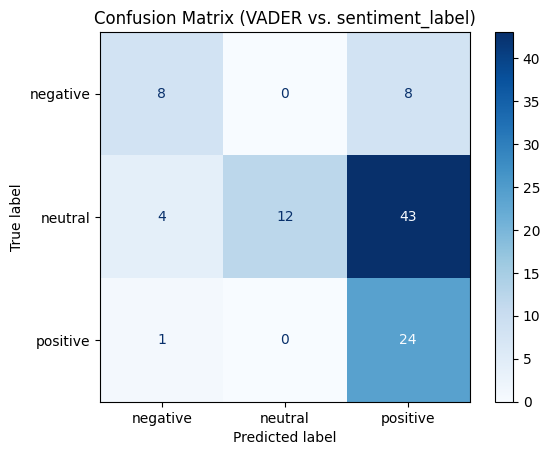

In [ ]:
# Calculate accuracy of VADER's predictions against sentiment_label
tweets['vader_pred'] = tweets['text'].apply(vader_sentiment)
vader_acc_sentiment_label = accuracy_score(tweets['sentiment_label'], tweets['vader_pred'])
print("VADER Accuracy against sentiment_label:", vader_acc_sentiment_label)

# Generate a detailed classification report
print("\nClassification Report (VADER vs. sentiment_label):\n")
print(classification_report(tweets['sentiment_label'], tweets['vader_pred']))

# 3. Compute and display the confusion matrix
cm_sentiment_label = confusion_matrix(tweets['sentiment_label'], tweets['vader_pred'])
disp_sentiment_label = ConfusionMatrixDisplay(confusion_matrix=cm_sentiment_label, display_labels=tweets['sentiment_label'].unique())
disp_sentiment_label.plot(cmap="Blues")
plt.title("Confusion Matrix (VADER vs. sentiment_label)")
plt.show()

# 4. Classical Machine Learning Models


Accuracy: 0.7
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.00      0.00      0.00         3
    positive       0.70      1.00      0.82        14

    accuracy                           0.70        20
   macro avg       0.23      0.33      0.27        20
weighted avg       0.49      0.70      0.58        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


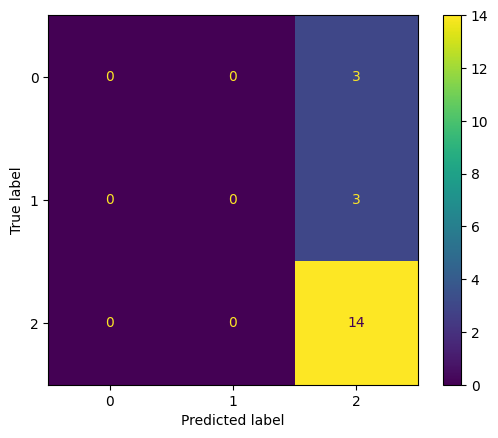

In [ ]:
# Logistic Regression + TF-IDF (Tweets Dataset)
X = tweets['text']
y = tweets['label']

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_vec = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, pred)).plot()
plt.show()

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!



IMDB Naive Bayes Accuracy: 0.8075
              precision    recall  f1-score   support

         neg       0.79      0.84      0.81       199
         pos       0.83      0.78      0.80       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



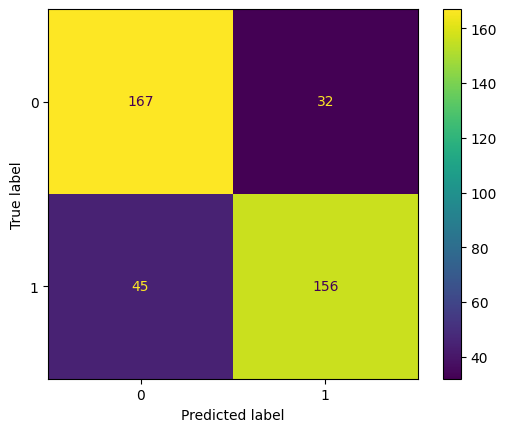

In [ ]:
# Naïve Bayes (Using IMDB Dataset via NLTK)
from nltk.corpus import movie_reviews
import nltk
nltk.download('movie_reviews')

docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(docs, columns=['text', 'label'])

tfidf_imdb = TfidfVectorizer(stop_words='english', max_features=4000)
X_imdb = tfidf_imdb.fit_transform(df['text'])
y_imdb = df['label']

X_tr, X_te, y_tr, y_te = train_test_split(X_imdb, y_imdb, test_size=0.2, random_state=42)

nb = MultinomialNB()
nb.fit(X_tr, y_tr)
pred_nb = nb.predict(X_te)

print("\nIMDB Naive Bayes Accuracy:", accuracy_score(y_te, pred_nb))
print(classification_report(y_te, pred_nb))

ConfusionMatrixDisplay(confusion_matrix(y_te, pred_nb)).plot()
plt.show()


# 5. Neural Network for NLP (Pytouch)

In [ ]:
# Extract texts and labels from the docs
texts = [text for text, _ in docs]
labels = [label for _, label in docs]

# Convert 'pos' and 'neg' labels to numerical (0 and 1)
label_map = {'neg': 0, 'pos': 1}
labels = np.array([label_map[label] for label in labels])

print("Number of IMDB samples (NLTK):", len(texts))

Number of IMDB samples (NLTK): 2000


In [ ]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(texts).toarray()
y = labels

# Split data into training and testing sets for the neural network
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Dataset Class
class IMDBDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# DataLoaders - Uses X_train_nn, y_train_nn, etc. from IMDB dataset
train_data = IMDBDataset(X_train_nn, y_train_nn)
test_data  = IMDBDataset(X_test_nn, y_test_nn)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=32)

In [ ]:
# Build a Feedforward Network
class FFNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.4)

        self.fc2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.4)

        self.out = nn.Linear(128, 2)   # IMDB has 2 classes (pos/neg)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        return self.out(x)

# Initialize FFNN with X_train_nn's feature dimension (5000)
model = FFNN(X_train_nn.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the Neural Network
epochs = 10

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for Xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss:.4f}")

Epoch 1/10 - Loss: 59.6362
Epoch 2/10 - Loss: 16.2425
Epoch 3/10 - Loss: 2.8944
Epoch 4/10 - Loss: 0.6569
Epoch 5/10 - Loss: 0.2147
Epoch 6/10 - Loss: 0.1065
Epoch 7/10 - Loss: 0.0556
Epoch 8/10 - Loss: 0.0386
Epoch 9/10 - Loss: 0.0288
Epoch 10/10 - Loss: 0.0285


Neural Network Accuracy (IMDB): 0.8325
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       199
           1       0.84      0.82      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



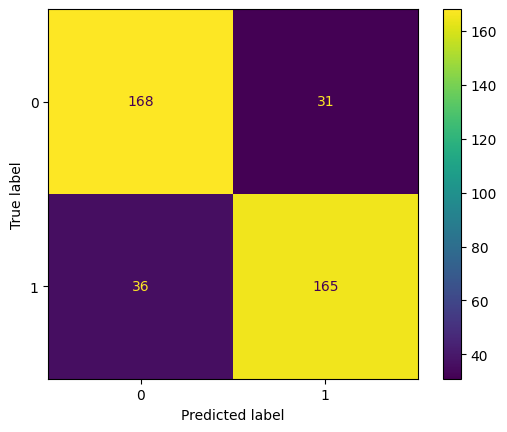

In [ ]:
# Evaluation on Test Set
model.eval()
preds = []
true = []

with torch.no_grad():
    for Xb, yb in test_loader:
        out = model(Xb)
        _, predicted = torch.max(out, 1)
        preds.extend(predicted.numpy())
        true.extend(yb.numpy())

nn_acc_imdb = accuracy_score(true, preds)

print("Neural Network Accuracy (IMDB):", nn_acc_imdb)
print(classification_report(true, preds))
ConfusionMatrixDisplay(confusion_matrix(true, preds)).plot()
plt.show()

# 6. Neural Network for 200 Product Reviews

In [ ]:
reviews.head()

,text,sentiment_score,clarity,sent_richness,relevance_score
0,jerzees long sleeve tee fantastic wardrobe sta...,0.235714,1.0,1.000000,1.000000
1,lb chest shoulder purchased xl plenty room lay...,0.053704,1.0,0.985294,0.994118
2,pure champ pack boy sweatpants fantastic find ...,0.338683,1.0,0.983871,0.993548
3,ordered loved one face week bed couch rest fol...,0.269531,1.0,0.983333,0.993333
4,got pack tee brother he basically living ever ...,0.149537,1.0,0.981481,0.992593


In [ ]:
# Load Cleaned Product Reviews
reviews = pd.read_csv("cleaned_top200_reviews.csv")

def score_to_label(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

reviews['sentiment_label'] = reviews['sentiment_score'].apply(score_to_label)

label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
reviews['label'] = reviews['sentiment_label'].map(label_map)

In [ ]:
# TF-IDF Vectorization
tfidf2 = TfidfVectorizer(max_features=3000)
X2 = tfidf2.fit_transform(reviews['text']).toarray()
y2 = reviews['label'].values

# Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

Epoch 1 - Loss: 10.5522
Epoch 2 - Loss: 8.4086
Epoch 3 - Loss: 4.1427
Epoch 4 - Loss: 1.2180
Epoch 5 - Loss: 0.6780
Epoch 6 - Loss: 0.5520
Epoch 7 - Loss: 0.4794
Epoch 8 - Loss: 0.3828
Epoch 9 - Loss: 0.3526
Epoch 10 - Loss: 0.3018

 Neural Network Accuracy for 200 Product Reviews: 0.975
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.97      1.00      0.99        39

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



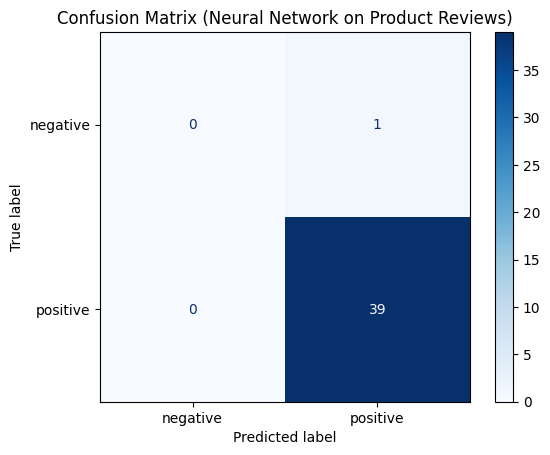

In [ ]:
# Dataset + DataLoader
train_data2 = IMDBDataset(X_train2, y_train2)
test_data2  = IMDBDataset(X_test2, y_test2)

train_loader2 = DataLoader(train_data2, batch_size=16, shuffle=True)
test_loader2  = DataLoader(test_data2, batch_size=16)

# Build a 3-Class NN for Reviews
model2 = FFNN(X_train2.shape[1])
model2.out = nn.Linear(128, 3)   # 3 classes for reviews

# Train
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

for epoch in range(10):
    model2.train()
    total_loss = 0
    for Xb, yb in train_loader2:
        optimizer.zero_grad()
        out = model2(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss:.4f}")

# Evaluate
model2.eval()
preds2 = []
true2 = []

with torch.no_grad():
    for Xb, yb in test_loader2:
        out = model2(Xb)
        _, predicted = torch.max(out, 1)
        preds2.extend(predicted.numpy())
        true2.extend(yb.numpy())

nn_acc_reviews = accuracy_score(true2, preds2)
print("\n Neural Network Accuracy for 200 Product Reviews:", nn_acc_reviews)

# Modified: Add zero_division to classification_report and display confusion matrix
print(classification_report(true2, preds2, zero_division=0)) # Suppress warning

# Compute and display the confusion matrix
cm_reviews = confusion_matrix(true2, preds2)

# Determine display labels based on the actual classes present in the test set
# From y_test2 and label_map: 0='negative', 1='neutral', 2='positive'
review_display_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}
actual_present_labels = sorted(np.unique(np.concatenate((true2, preds2))))
display_labels_names = [review_display_labels[l] for l in actual_present_labels]

disp_reviews = ConfusionMatrixDisplay(confusion_matrix=cm_reviews, display_labels=display_labels_names)
disp_reviews.plot(cmap="Blues")
plt.title("Confusion Matrix (Neural Network on Product Reviews)")
plt.show()

# 7. Naïve Bayes Comparison


 Naive Bayes Accuracy for 200 Product Reviews: 0.975
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.97      1.00      0.99        39

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



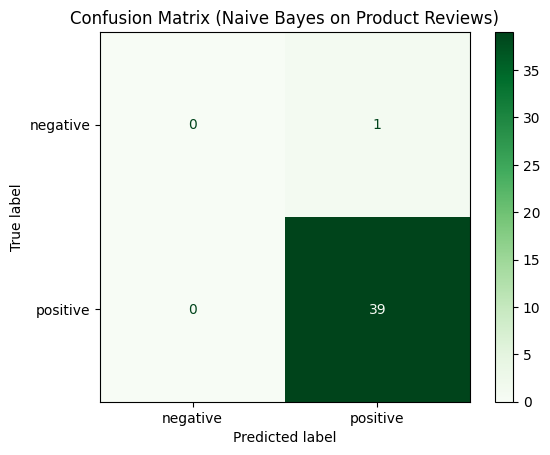

In [ ]:
nb = MultinomialNB()
nb.fit(X_train2, y_train2)
nb_preds = nb.predict(X_test2)

nb_acc = accuracy_score(y_test2, nb_preds)
print("\n Naive Bayes Accuracy for 200 Product Reviews:", nb_acc)

# Modified: Add zero_division to classification_report
print(classification_report(y_test2, nb_preds, zero_division=0))

# Compute and display the confusion matrix for Naive Bayes on Product Reviews
cm_nb_reviews = confusion_matrix(y_test2, nb_preds)

# Determine display labels based on the actual classes present in the test set for reviews
# From y_test2 and label_map: 0='negative', 1='neutral', 2='positive'
review_display_labels_nb = {0: 'negative', 1: 'neutral', 2: 'positive'}
actual_present_labels_nb = sorted(np.unique(np.concatenate((y_test2, nb_preds))))
display_labels_names_nb = [review_display_labels_nb[l] for l in actual_present_labels_nb]

disp_nb_reviews = ConfusionMatrixDisplay(confusion_matrix=cm_nb_reviews, display_labels=display_labels_names_nb)
disp_nb_reviews.plot(cmap="Greens")
plt.title("Confusion Matrix (Naive Bayes on Product Reviews)")
plt.show()

# 8. Model Comparison

In [ ]:
sia = SentimentIntensityAnalyzer()

def vader_label(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

tweets['label'] = tweets['text'].apply(vader_label)

X_tweets_comp = tweets['text']
y_tweets_comp = tweets['label']

tfidf_comp = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_vec_comp = tfidf_comp.fit_transform(X_tweets_comp)

# Re-split data to ensure consistent y_test and pred for Logistic Regression
# Using different variable names to avoid conflicts with other test sets
_, X_test_lg_tweets, _, y_test_lg_tweets = train_test_split(X_vec_comp, y_tweets_comp, test_size=0.2, random_state=42)

# Assuming 'logreg' model is already trained and available from cell jN5UbBmw0Ym5
pred_lg_tweets = logreg.predict(X_test_lg_tweets)
logreg_tweets_acc = accuracy_score(y_test_lg_tweets, pred_lg_tweets)

comparison = pd.DataFrame({
    "Model": [
        "VADER",
        "Logistic Regression",
        "Naive Bayes",
        "Neural Network",
        "Naive Bayes",
        "Neural Network"
    ],
    "Dataset": [
        "Tweets",
        "Tweets",
        "IMDB",
        "IMDB",
        "Reviews",
        "Reviews"
    ],
    "Performance": [
        vader_acc_sentiment_label,
        logreg_tweets_acc, # Use the re-calculated accuracy for Logistic Regression on Tweets
        accuracy_score(y_te, pred_nb),
        nn_acc_imdb,
        nb_acc,
        nn_acc_reviews
    ]
})

print(comparison)

                 Model  Dataset  Performance
0                VADER   Tweets       0.4400
1  Logistic Regression   Tweets       0.7000
2          Naive Bayes     IMDB       0.8075
3       Neural Network     IMDB       0.8325
4          Naive Bayes  Reviews       0.9750
5       Neural Network  Reviews       0.9750


# Data Visualization

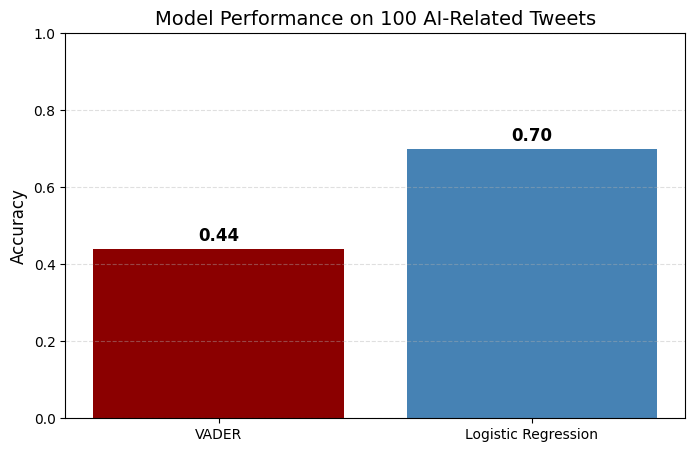

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['VADER', 'Logistic Regression']
performance = [0.44, 0.70]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, performance, color=['darkred', 'steelblue'])

# Add value labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.02,
        f"{yval:.2f}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Formatting
plt.title("Model Performance on 100 AI-Related Tweets", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Accuracy scale
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

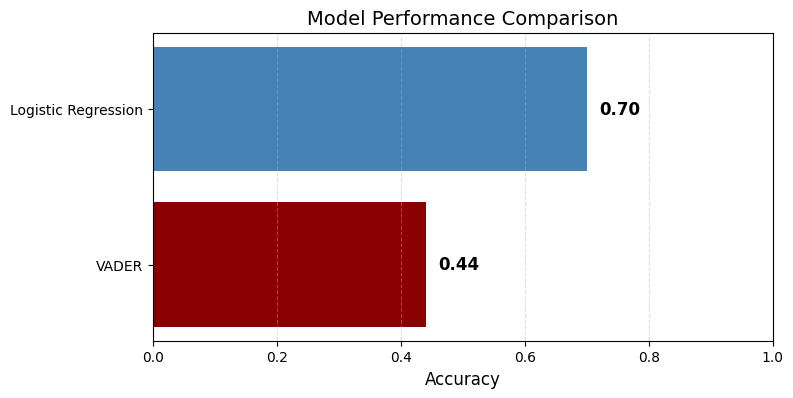

In [ ]:
plt.figure(figsize=(8, 4))
bars = plt.barh(models, performance, color=['darkred', 'steelblue'])

# Add labels
for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval + 0.02,
        bar.get_y() + bar.get_height()/2,
        f"{xval:.2f}",
        va='center',
        fontsize=12,
        fontweight='bold'
    )

plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.show()

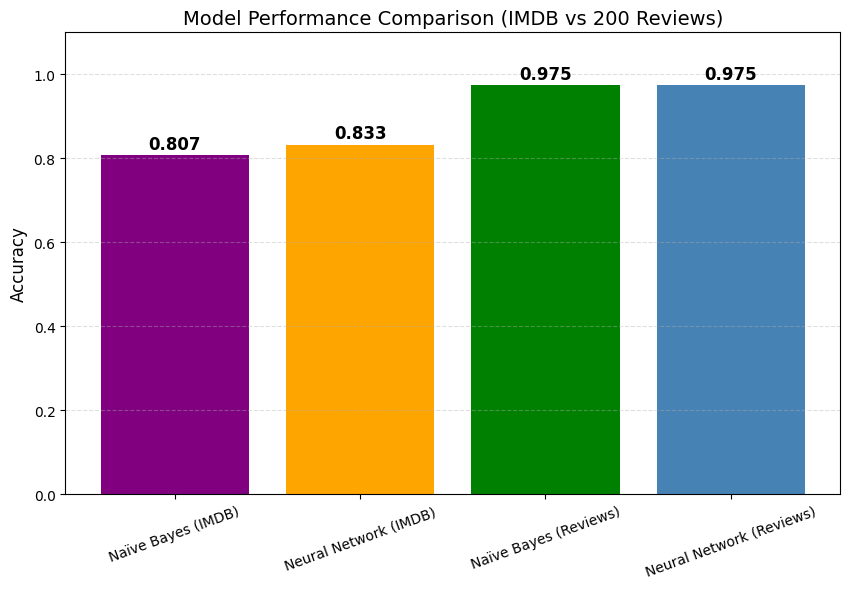

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Naïve Bayes (IMDB)', 'Neural Network (IMDB)',
          'Naïve Bayes (Reviews)', 'Neural Network (Reviews)']

performance = [0.8075, 0.8325, 0.9750, 0.9750]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, performance, color=['purple', 'orange', 'green', 'steelblue'])

# Add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.015,
        f"{height:.3f}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Formatting
plt.title("Model Performance Comparison (IMDB vs 200 Reviews)", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.1)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

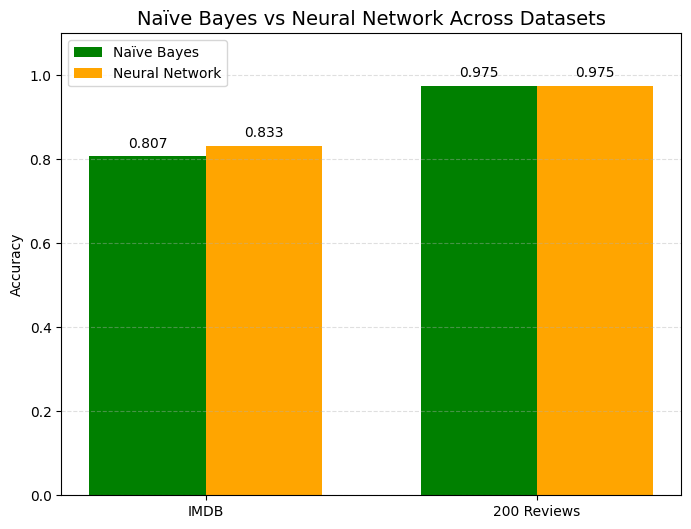

In [ ]:
datasets = ['IMDB', '200 Reviews']
nb_scores = [0.8075, 0.9750]
nn_scores = [0.8325, 0.9750]

x = np.arange(len(datasets))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, nb_scores, width, label='Naïve Bayes', color='green')
plt.bar(x + width/2, nn_scores, width, label='Neural Network', color='orange')

# Add text labels
for i in range(len(x)):
    plt.text(x[i] - width/2, nb_scores[i] + 0.02, f"{nb_scores[i]:.3f}", ha='center')
    plt.text(x[i] + width/2, nn_scores[i] + 0.02, f"{nn_scores[i]:.3f}", ha='center')

plt.title("Naïve Bayes vs Neural Network Across Datasets", fontsize=14)
plt.ylabel("Accuracy")
plt.xticks(x, datasets)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()